In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
nump = 100000
#np.random.seed(10484628)
#r = np.random.uniform(0, 1, nump)
#np.random.seed(49271)
#theta = np.random.uniform(0, 2*np.pi, nump)
#x = r*np.cos(theta)
#y = r*np.sin(theta)

np.random.seed(2356876554)
x = np.random.uniform(-35, 35, nump)
np.random.seed(765432)
y = np.random.uniform(-35, 35, nump)
np.random.seed(94857583)
z = np.random.uniform(-35, 35, nump)

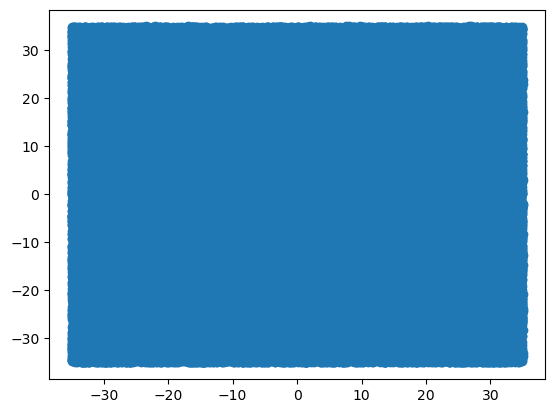

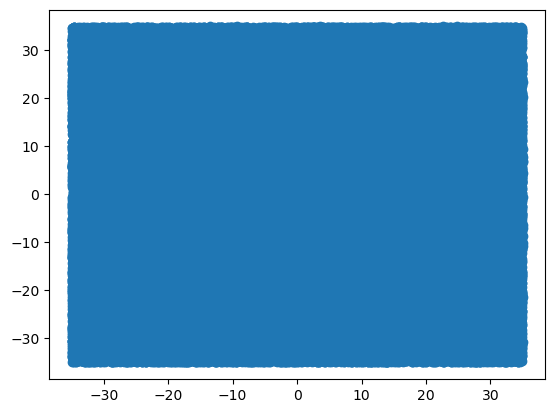

In [4]:
plt.plot(x, y, 'o')
plt.figure()
plt.plot(x, z, 'o')

In [5]:
mask = np.ones(nump, dtype=bool)
mask[(x**2 + y**2 > (39.9/2)**2) & (z**2 + y**2 > (39.9/2)**2) & (x**2 + z**2 > (39.9/2)**2)] = False
mask[(abs(x)>69.9/2)] = False
mask[(abs(y)>69.9/2)]= False
mask[(abs(z)>69.9/2)]= False
x = x[mask]
y = y[mask]
z = z[mask]
nump2 = len(x)

Text(0, 0.5, 'z (mm)')

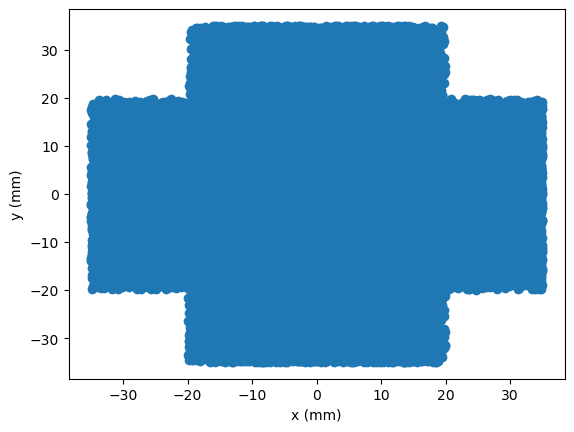

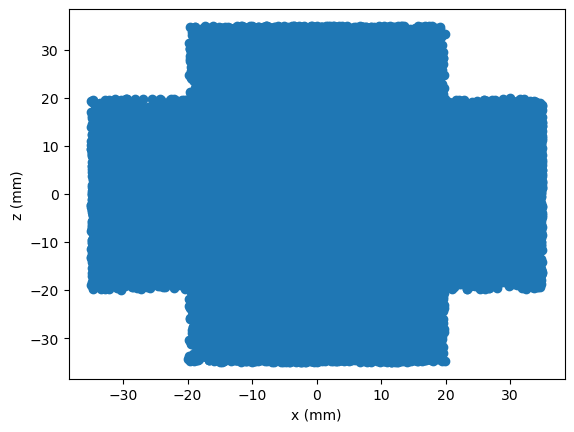

In [6]:
plt.plot(x, y, 'o')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.figure()
plt.plot(x, z, 'o')
plt.xlabel('x (mm)')
plt.ylabel('z (mm)')

In [7]:
np.random.seed(62846)
phi = np.random.uniform(0, 1, len(x))
phi = np.arccos(1-2*phi)
np.random.seed(94720)
theta= np.random.uniform(0, 2*np.pi, len(x))

ran = 3.57 # this is just place holder number for now


In [8]:
# Assuming radius is fixed and given as 'ran'
radius = ran

# Convert spherical coordinates to Cartesian coordinates
x_spherical = radius * np.sin(phi) * np.cos(theta)
y_spherical = radius * np.sin(phi) * np.sin(theta)
z_spherical = radius * np.cos(phi)

In [9]:
xf = x+x_spherical
yf = y+y_spherical
zf = z+z_spherical

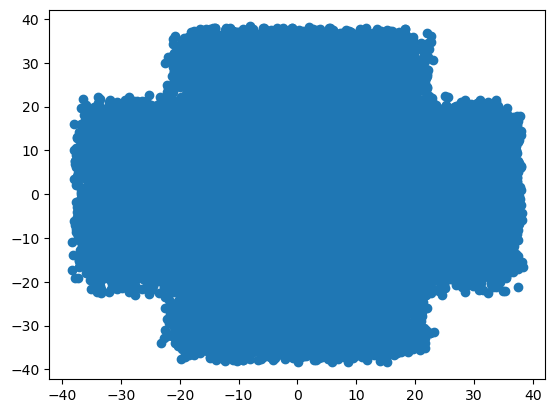

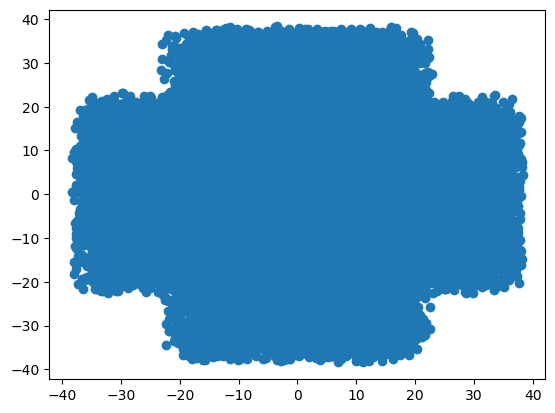

In [10]:
plt.plot(xf, yf, 'o')
plt.figure()
plt.plot(xf, zf, 'o')

In [11]:
mask = np.ones(len(xf), dtype=bool)
mask[(np.sqrt(xf**2 + yf**2) > 3.5)] = False
#mask[(abs(xf)>69.9/2)] = False
#mask[(abs(yf)>69.9/2)]= False
mask[(15>abs(zf))]= False
mask[(34<abs(zf))]= False
xf = xf[mask]
yf = yf[mask]
zf = zf[mask]

x2 = x[mask]
y2 = y[mask]
z2 = z[mask]

Text(0, 0.5, 'z (mm)')

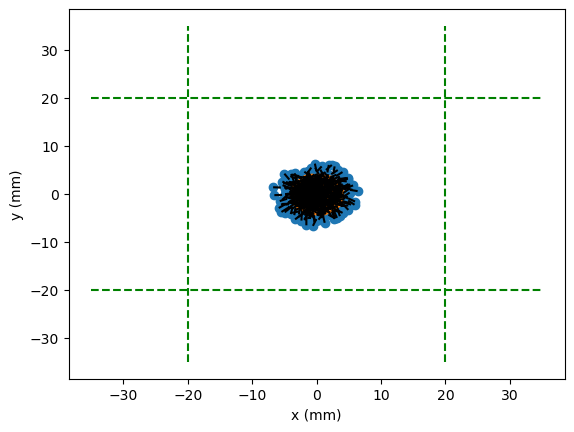

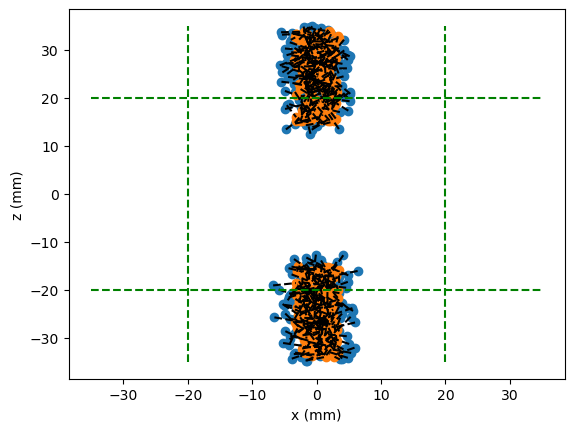

In [12]:
plt.plot(x2, y2, 'o')
plt.plot(xf, yf, 'o')
for i in range(len(xf)):
    plt.plot([x2[i], xf[i]], [y2[i], yf[i]], 'k--')
plt.plot([-35, 35], [20, 20], 'g--')
plt.plot([-35, 35], [-20, -20], 'g--')
plt.plot([20, 20], [-35, 35], 'g--')
plt.plot([-20, -20], [-35, 35], 'g--')


plt.xlabel('x (mm)')
plt.ylabel('y (mm)')

plt.figure()
plt.plot(x2, z2, 'o')
plt.plot(xf, zf, 'o')

for i in range(len(xf)):
    plt.plot([x2[i], xf[i]], [z2[i], zf[i]], 'k--')
    
plt.plot([-35, 35], [20, 20], 'g--')
plt.plot([-35, 35], [-20, -20], 'g--')
plt.plot([20, 20], [-35, 35], 'g--')
plt.plot([-20, -20], [-35, 35], 'g--')


plt.xlabel('x (mm)')
plt.ylabel('z (mm)')

In [13]:
def mag(c):
    return np.sqrt(c[0]**2 + c[1]**2)

def sign(num):
    if num < 0:
        return -1
    else:
        return 1
    
def intersect(x1, y1, z1, x2, y2, z2, rad):
    x1 = x1
    x2 = x2
    y1 = y1
    y2 = y2
    xs = np.array([x1, y1])
    xf = np.array([x2, y2])
    a = (y2-y1)/(x2-x1)
    b = y1-a*x1
    sq = a**2*b**2 - (1+a**2)*(b**2-rad**2)
    c = (z2-z1)/(x2-x1)
    z0 = z1-c*x1

    if sq < 0:
        return False
    
    else:
        xsoln1 = (-a*b+np.sqrt(sq))/((1+a**2))
        xsoln2 = (-a*b-np.sqrt(sq))/((1+a**2))
        soln1 = np.array([xsoln1, a*xsoln1+b])
        soln2 = np.array([xsoln2, a*xsoln2+b])
        zsoln1 = c*xsoln1+z0
        zsoln2 = c*xsoln2+z0

        xs_soln1 = soln1-xs
        xs_soln2 = soln2-xs
        xs_xf = xf-xs
        if mag(xs_soln1)<mag(xs_xf) and sign(xs_soln1[0])==sign(xs_xf[0]) and sign(xs_soln1[1])==sign(xs_xf[1]):
            if zsoln1**2 + soln1[0]**2 < rad**2 and zsoln1**2 + soln1[1]**2 < rad**2:
                hit = 0
            else:
                hit = 1
        elif mag(xs_soln2)<mag(xs_xf) and sign(xs_soln2[0])==sign(xs_xf[0]) and sign(xs_soln2[1])==sign(xs_xf[1]):
            if zsoln2**2 + soln2[0]**2 < rad**2 and zsoln2**2 + soln2[1]**2 < rad**2:
                hit = 0
            else:
                hit = 1
        else:
            hit = 0
        if hit == 1:
            return True
        else:
            return False

In [14]:
args = [i for i in range(len(xf)) if not intersect(x2[i], y2[i], z2[i], xf[i], yf[i], zf[i], 39.9/2)]
args2 = [i for i in range(len(xf)) if not intersect(y2[i], z2[i], z2[i], yf[i], zf[i], xf[i], 39.9/2)]
args3 = [i for i in range(len(xf)) if not intersect(z2[i], x2[i], y2[i], zf[i], xf[i], yf[i], 39.9/2)]

In [15]:
def intersect2(x1, y1, x2, y2, c, rad):
    x1 = x1-c[0]
    x2 = x2-c[0]
    y1 = y1-c[1]
    y2 = y2-c[1]
    xs = np.array([x1, y1])
    xf = np.array([x2, y2])
    a = (y2-y1)/(x2-x1)
    b = y1-a*x1
    sq = a**2*b**2 - (1+a**2)*(b**2-rad**2)
    if sq < 0:
        return False
    else:
        xsoln1 = (-a*b+np.sqrt(sq))/((1+a**2))
        xsoln2 = (-a*b-np.sqrt(sq))/((1+a**2))
        soln1 = np.array([xsoln1, a*xsoln1+b])
        soln2 = np.array([xsoln2, a*xsoln2+b])
        xs_soln1 = soln1-xs
        xs_soln2 = soln2-xs
        xs_xf = xf-xs
        if mag(xs_soln1)<mag(xs_xf) and sign(xs_soln1[0])==sign(xs_xf[0]) and sign(xs_soln1[1])==sign(xs_xf[1]):
            return True
        elif mag(xs_soln2)<mag(xs_xf) and sign(xs_soln2[0])==sign(xs_xf[0]) and sign(xs_soln2[1])==sign(xs_xf[1]):
            return True
        else:
            return False

In [16]:
args4 = [i for i in range(len(xf)) if not intersect2(x2[i], y2[i], xf[i], yf[i], [8, 8], 2)]
args5 = [i for i in range(len(xf)) if not intersect2(x2[i], y2[i], xf[i], yf[i], [-8, 8], 2)]
args6 = [i for i in range(len(xf)) if not intersect2(x2[i], y2[i], xf[i], yf[i], [8, -8], 2)]
args7 = [i for i in range(len(xf)) if not intersect2(x2[i], y2[i], xf[i], yf[i], [-8, -8], 2)]
args12 = [i for i in range(len(xf)) if not intersect2(x2[i], y2[i], xf[i], yf[i], [1.5, 4], 0.5)]
args13 = [i for i in range(len(xf)) if not intersect2(x2[i], y2[i], xf[i], yf[i], [-1.5, 4], 0.5)]
args14 = [i for i in range(len(xf)) if not intersect2(x2[i], y2[i], xf[i], yf[i], [1.5, -4], 0.5)]
args15 = [i for i in range(len(xf)) if not intersect2(x2[i], y2[i], xf[i], yf[i], [-1.5,- 4], 0.5)]

In [17]:
args = [x for x in args if x in args2 and x in args3 and x in args4 and x in args5 and x in args6 and x in args7 and x in args12 and x in args13 and x in args14 and x in args15]

Text(0, 0.5, 'z (mm)')

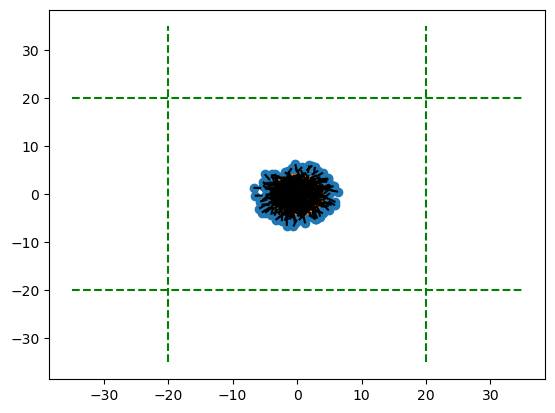

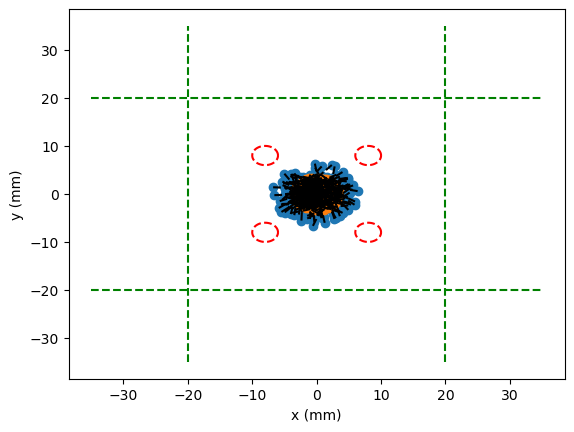

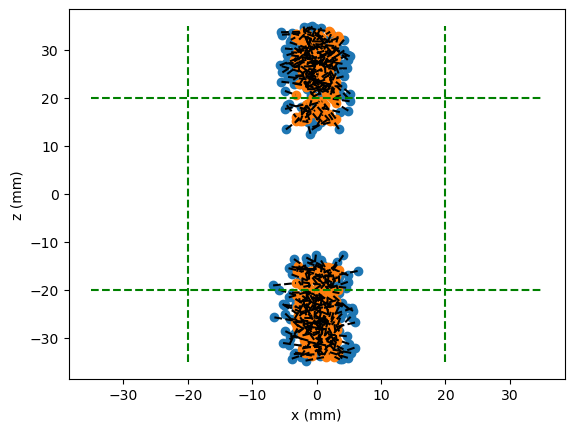

In [18]:
plt.plot(x2, y2, 'o')
plt.plot(xf, yf, 'o')
for i in range(len(xf)):
    plt.plot([x2[i], xf[i]], [y2[i], yf[i]], 'k--')
plt.plot([-35, 35], [20, 20], 'g--')
plt.plot([-35, 35], [-20, -20], 'g--')
plt.plot([20, 20], [-35, 35], 'g--')
plt.plot([-20, -20], [-35, 35], 'g--')

plt.figure()

plt.plot(x2[args], y2[args], 'o')
plt.plot(xf[args], yf[args], 'o')
for i in range(len(xf[args])):
    plt.plot([x2[args][i], xf[args][i]], [y2[args][i], yf[args][i]], 'k--')

plt.plot([-35, 35], [20, 20], 'g--')
plt.plot([-35, 35], [-20, -20], 'g--')
plt.plot([20, 20], [-35, 35], 'g--')
plt.plot([-20, -20], [-35, 35], 'g--')

angle = np.linspace(0, 2*np.pi, 100)

plt.plot(2*np.cos(angle)+8, 2*np.sin(angle)+8, 'r--')
plt.plot(2*np.cos(angle)-8, 2*np.sin(angle)+8, 'r--')
plt.plot(2*np.cos(angle)+8, 2*np.sin(angle)-8, 'r--')
plt.plot(2*np.cos(angle)-8, 2*np.sin(angle)-8, 'r--')

plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.figure()

plt.plot(x2[args], z2[args], 'o')
plt.plot(xf[args], zf[args], 'o')
for i in range(len(xf[args])):
    plt.plot([x2[args][i], xf[args][i]], [z2[args][i], zf[args][i]], 'k--')
plt.plot([-35, 35], [20, 20], 'g--')
plt.plot([-35, 35], [-20, -20], 'g--')
plt.plot([20, 20], [-35, 35], 'g--')
plt.plot([-20, -20], [-35, 35], 'g--')

plt.xlabel('x (mm)')
plt.ylabel('z (mm)')

In [19]:
def intersect3(x1, y1, z1, x2, y2, z2, z0, lims):
    a = (z2-z1)/(x2-x1)
    b = z1-a*x1
    x0 = (z0-b)/a

    a = (z2-z1)/(y2-y1)
    b = z1-a*y1
    y0 = (z0-b)/a
    if (z1>z0 and z2> z0) or (z1<z0 and z2<z0):
        return False
    elif abs(x0) > lims[0] and abs(y0) > lims[1]:
        return False
    else:
        return True

In [20]:
intersect3(0, 0, -33,1, 1, -30, -34, [15, 12])

False

In [21]:
xf2 = xf[args]
yf2 = yf[args]
zf2 = zf[args]

x3 = x2[args]
y3 = y2[args]
z3 = z2[args]

In [22]:
args8 = [i for i in range(len(xf2)) if not intersect3(x3[i], y3[i], z3[i], xf2[i], yf2[i], zf2[i], 15, [15, 12])]
args9 = [i for i in range(len(xf2)) if not intersect3(x3[i], y3[i], z3[i], xf2[i], yf2[i], zf2[i], -15, [15, 12])]
args10 = [i for i in range(len(xf2)) if not intersect3(x3[i], y3[i], z3[i], xf2[i], yf2[i], zf2[i], 34, [15, 12])]
args11 = [i for i in range(len(xf2)) if not intersect3(x3[i], y3[i], z3[i], xf2[i], yf2[i], zf2[i], -34, [15, 12])]

In [23]:
args8 = [x for x in args8 if x in args9 and x in args10 and x in args11]

Text(0, 0.5, 'y (mm)')

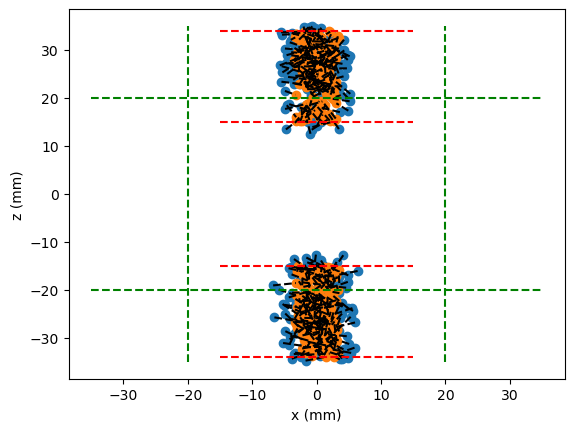

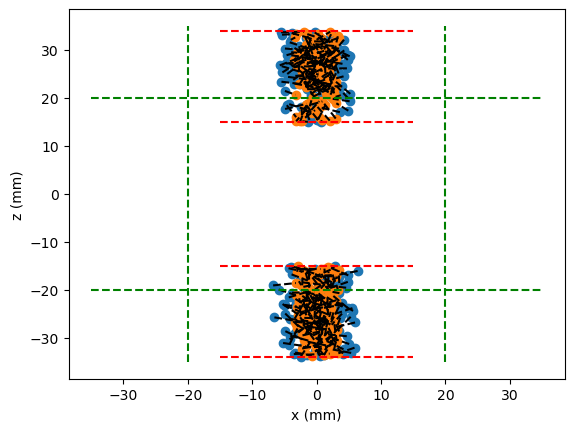

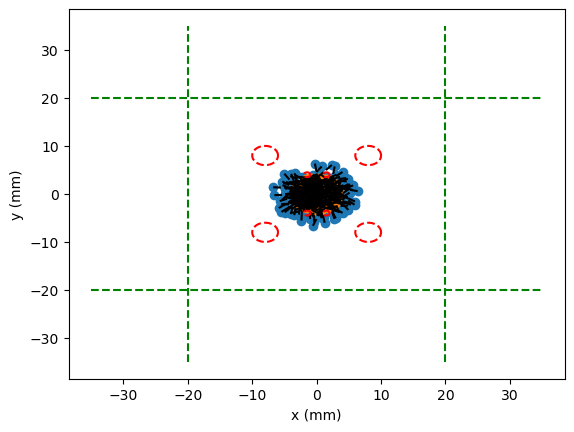

In [24]:
plt.plot(x3, z3, 'o')
plt.plot(xf2, zf2, 'o')
for i in range(len(xf2)):
    plt.plot([x3[i], xf2[i]], [z3[i], zf2[i]], 'k--')
plt.plot([-35, 35], [20, 20], 'g--')
plt.plot([-35, 35], [-20, -20], 'g--')
plt.plot([20, 20], [-35, 35], 'g--')
plt.plot([-20, -20], [-35, 35], 'g--')

plt.plot([-15, 15], [15, 15], 'r--')
plt.plot([-15, 15], [-15, -15], 'r--')
plt.plot([-15, 15], [34, 34], 'r--')
plt.plot([-15, 15], [-34, -34], 'r--')

plt.xlabel('x (mm)')
plt.ylabel('z (mm)')
plt.figure()

plt.plot(x3[args8], z3[args8], 'o')
plt.plot(xf2[args8], zf2[args8], 'o')
for i in range(len(xf2[args8])):
    plt.plot([x3[args8][i], xf2[args8][i]], [z3[args8][i], zf2[args8][i]], 'k--')
plt.plot([-35, 35], [20, 20], 'g--')
plt.plot([-35, 35], [-20, -20], 'g--')
plt.plot([20, 20], [-35, 35], 'g--')
plt.plot([-20, -20], [-35, 35], 'g--')

plt.plot([-15, 15], [15, 15], 'r--')
plt.plot([-15, 15], [-15, -15], 'r--')
plt.plot([-15, 15], [34, 34], 'r--')
plt.plot([-15, 15], [-34, -34], 'r--')

plt.xlabel('x (mm)')
plt.ylabel('z (mm)')

plt.figure()

plt.plot(x3[args8], y3[args8], 'o')
plt.plot(xf2[args8], yf2[args8], 'o')
for i in range(len(xf2[args8])):
    plt.plot([x3[args8][i], xf2[args8][i]], [y3[args8][i], yf2[args8][i]], 'k--')

plt.plot([-35, 35], [20, 20], 'g--')
plt.plot([-35, 35], [-20, -20], 'g--')
plt.plot([20, 20], [-35, 35], 'g--')
plt.plot([-20, -20], [-35, 35], 'g--')

angle = np.linspace(0, 2*np.pi, 100)

plt.plot(2*np.cos(angle)+8, 2*np.sin(angle)+8, 'r--')
plt.plot(2*np.cos(angle)-8, 2*np.sin(angle)+8, 'r--')
plt.plot(2*np.cos(angle)+8, 2*np.sin(angle)-8, 'r--')
plt.plot(2*np.cos(angle)-8, 2*np.sin(angle)-8, 'r--')

plt.plot(0.5*np.cos(angle)+1.5, 0.5*np.sin(angle)+4, 'r--')
plt.plot(0.5*np.cos(angle)-1.5, 0.5*np.sin(angle)+4, 'r--')
plt.plot(0.5*np.cos(angle)+1.5, 0.5*np.sin(angle)-4, 'r--')
plt.plot(0.5*np.cos(angle)-1.5, 0.5*np.sin(angle)-4, 'r--')

plt.xlabel('x (mm)')
plt.ylabel('y (mm)')

In [42]:
0.004*0.6*len(xf2[args8])/nump2*10000

0.14548335974643423

In [428]:
pressures = [20, 10, 5, 1]
ranges = [3.57, 7.2, 14.39, 71.95]
effs = [0.006, 0.0045, 0.002, 0]

Text(0.5, 0, 'Pressure (mbar)')

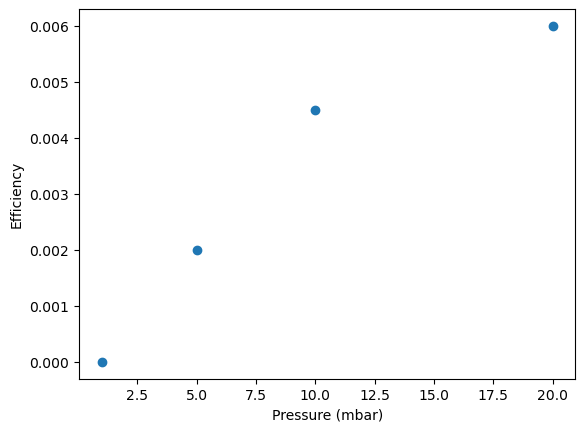

In [429]:
plt.plot(pressures, effs, 'o')
plt.ylabel('Efficiency')
plt.xlabel('Pressure (mbar)')

In [430]:
np.log(2)/(1.9*365*24*3600)*len(xf[args])/nump2

7.676985387381913e-11

[0.00000000e+00 2.20214699e-06 4.40421393e-06 ... 5.79067807e-02
 5.79068748e-02 5.79069689e-02]


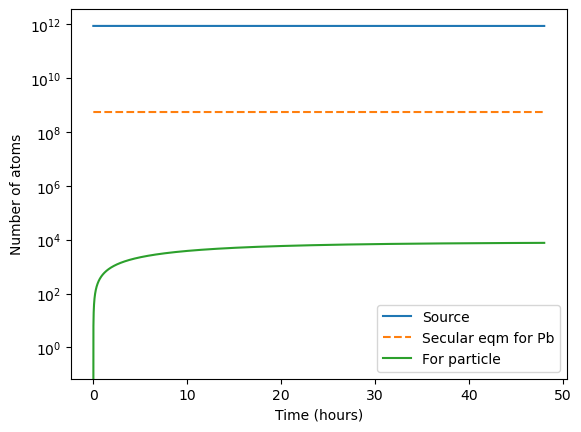

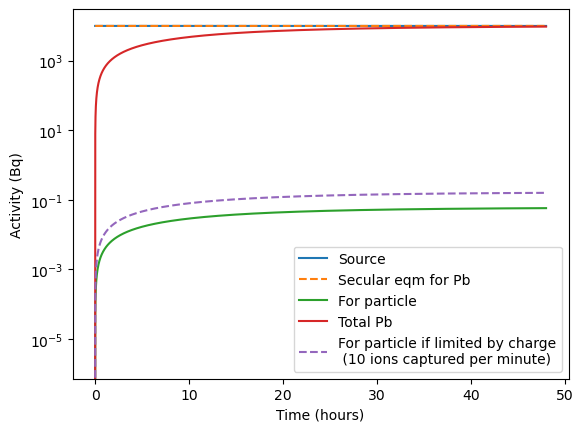

In [44]:
time = np.linspace(0, 3600*48, 3600*24)
lama = np.log(2)/(1.9*365*24*3600)
lamb = np.log(2)/(10.6*3600)
Na = 10000/lama
plt.plot(time/3600, Na*np.exp(-lama*time), label = 'Source')
plt.plot(time/3600, np.zeros(len(time))+Na*lama/lamb, '--', label = 'Secular eqm for Pb')
plt.plot(time/3600, 0.6*0.004*len(xf2[args8])/nump2*Na*lama/(lamb-lama)*(np.exp(-lama*time)-np.exp(-lamb*time)), label = 'For particle')
plt.yscale('log')

plt.xlabel('Time (hours)')
plt.ylabel('Number of atoms')

plt.legend()

plt.figure()
plt.plot(time/3600, Na*np.exp(-lama*time)*lama, label = 'Source')
plt.plot(time/3600, np.zeros(len(time))+Na*lama/lamb*lamb, '--',  label = 'Secular eqm for Pb') # secular eqm
plt.plot(time/3600, 0.25*0.004*len(xf2[args8])/nump2*Na*lama/(lamb-lama)*(np.exp(-lama*time)-np.exp(-lamb*time))*lamb, label = 'For particle') # efficiency due to being cut out
plt.plot(time/3600, Na*lama/(lamb-lama)*(np.exp(-lama*time)-np.exp(-lamb*time))*lamb, label = 'Total Pb') # regular path to secular eqm if we caught them all

print(0.25*0.004*len(xf2[args8])/nump2*Na*lama/(lamb-lama)*(np.exp(-lama*time)-np.exp(-lamb*time))*lamb)

# What if we can only get 10 on a minute (say we can charge up to 10 charges and cycle once a minute)
lama = 1/6/Na
plt.plot(time/3600, Na*lama/(lamb-lama)*(np.exp(-lama*time)-np.exp(-lamb*time))*lamb, '--', label = 'For particle if limited by charge\n (10 ions captured per minute)')


plt.yscale('log')

plt.xlabel('Time (hours)')
plt.ylabel('Activity (Bq)')

plt.legend()

In [31]:
0.6*0.004*len(xf[args])/nump2*Na*lama/(lamb-lama)*(np.exp(-lama*time)-np.exp(-lamb*time))*lamb

array([0.00000000e+00, 9.64338888e-11, 1.92864274e-10, ...,
       2.53947302e-06, 2.53947720e-06, 2.53948138e-06])

In [39]:
0.6*0.004*len(xf2[args8])

0.7343999999999999

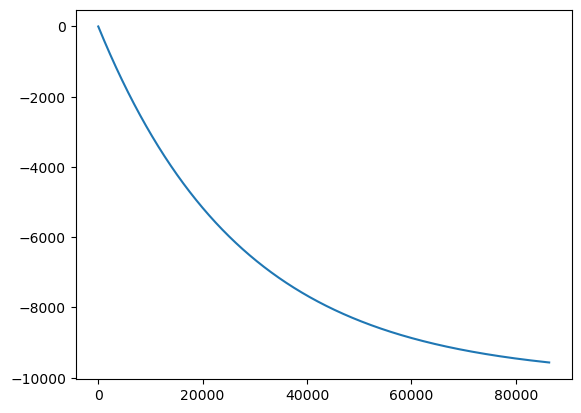

In [433]:
plt.plot(10000*lamb/(lama-lamb)*(np.exp(-lama*time)-np.exp(-lamb*time)))